# Initial Exploration: Correlation and Visualization

We have a data set of almost 180.000 campaigns. The data set has mostly (but not completely) been cleaned. Data for 100.000 projects  Download 100.000 projects(training set) is provided to you with information of whether the project was completely funded (succeeded) or not. For the remaining 78.065 projects  Download 78.065 projects(test set) the funding status is withheld. Your assignment is to train a model that will predict the funding status of the remaining projects. You will hand in these predictions, and then we can check how well your model did.

The grading of your project, however, does not depend on the quality of your model, it depends on how well you can explain what you did and why. 
You will show this in a presentation in the last week of the course. 

Funded, what determines it?

Predict funding status of the remaining projects.

launched at after deadline?


In [73]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)


While exploring the data we have understood that the delimeter is a komma, which result in unstructured visual representation of the excel file.

first we check if the deadline or start date had any correlation at all with funding, this was not the case. Furthermore we also tried and see if the funding goal had any effect, this also was not the case. Hence the quantitative data where we have our hands on do not correlate with the funding success

Which ones could introduce bias? What bias exactly?


Linear regression to find correlation
Logistic regression to find ocrrelation between multiple data for true or false classification
check mode for categorical data?


transform datestamp to datetime


multiple columns correlation



In [77]:
df = pd.read_csv (r'./KS_model_training_data.csv', sep = ',')
df = df.drop(columns=['backers_count', 'converted_pledged_amount', 'pledged', 'usd_pledged'])
df = df.dropna()

display(df)
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')
df['created_hour'] = df.created_at.apply(lambda x: x.hour)
df['created_month'] = df.created_at.apply(lambda x: x.month)
df['created_year'] = df.created_at.apply(lambda x: x.year)

# df['deadline_at'] = pd.to_datetime(df['deadline'],unit='s')
# df['deadline_hour'] = df.deadline.apply(lambda x: x.hour)


df["category"] = df["category"].astype('category')
df["category_encoded"] = df["category"].cat.codes
# print(df['category'])


df["subcategory"] = df["subcategory"].astype('category')
df["subcategory_encoded"] = df["subcategory"].cat.codes


df["location"] = df["location"].astype('category')
df["location_encoded"] = df["location"].cat.codes


df["country"] = df["country"].astype('category')
df["country_encoded"] = df["country"].cat.codes

df['blurb_length'] = df['blurb'].str.len()
df['name_length'] = df['name'].str.len()



print(np.corrcoef(df['funded'], df['category_encoded']))
# print(np.corrcoef(df['funded'], df['subcategory_encoded']))
# print(np.corrcoef(df['funded'], df['location_encoded']))
# print(np.corrcoef(df['funded'], df['country_encoded']))
# print(np.corrcoef(df['funded'], df['blurb_length']))
# print(np.corrcoef(df['funded'], df['fx_rate']))
# print(np.corrcoef(df['funded'], df['name_length']))

# print(df.head(10))

# print(np.corrcoef(df['funded'], df['staff_pick']))
# print(np.corrcoef(df['funded'], df['created_month']))
# print(np.corrcoef(df['funded'], df['deadline']))
# df['category'].value_counts()[:20].plot(kind='bar')
# df.plot.scatter(x = 'goal', y ='category')






IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 1.         -0.01871018]
 [-0.01871018  1.        ]]


https://pbpython.com/categorical-encoding.html
We tried to use labelencoding to give categorical values a code with wich we can then see if there is any correlation between categories and funding.

[Text(0.5, 0, 'Month of the Year'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Month the Project was Launched')]

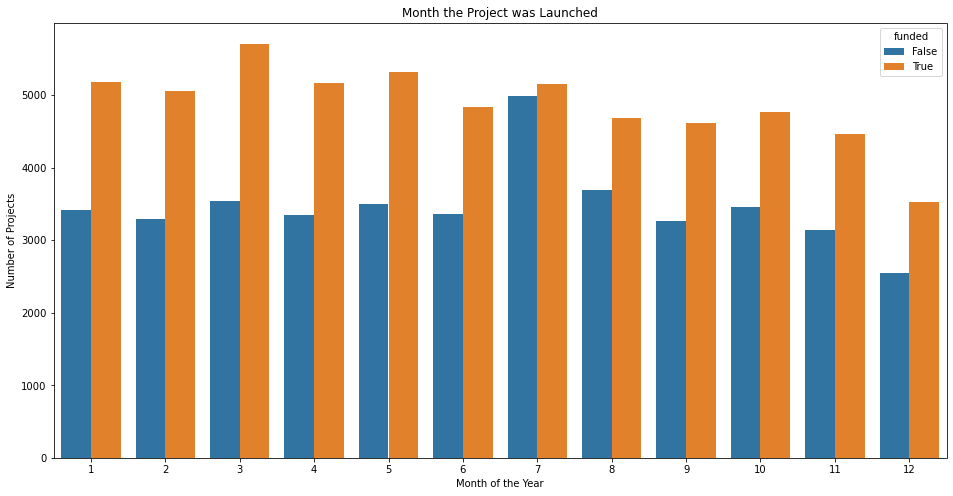

In [35]:
plot = sns.countplot(x=df.created_month, hue = df.funded)
plot.set(xlabel='Month of the Year', ylabel='Number of Projects', title= 'Month the Project was Launched')



[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Year the project was launched')]

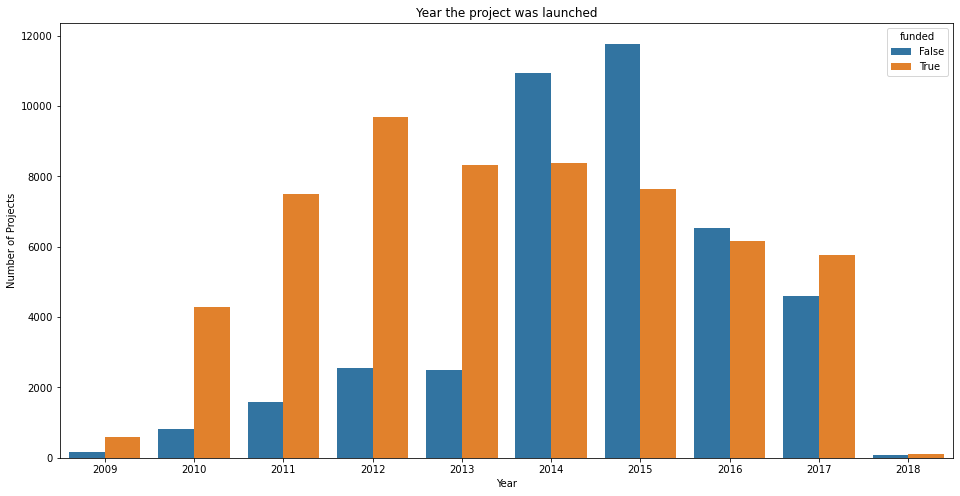

In [39]:
plot = sns.countplot(x=df.created_year, hue = df.funded)
plot.set(xlabel='Year', ylabel='Number of Projects', title= 'Year the project was launched')


sadsadsaa

In [ ]:
sns.pairplot(df.sample(100), hue='funded', size=1.5)

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

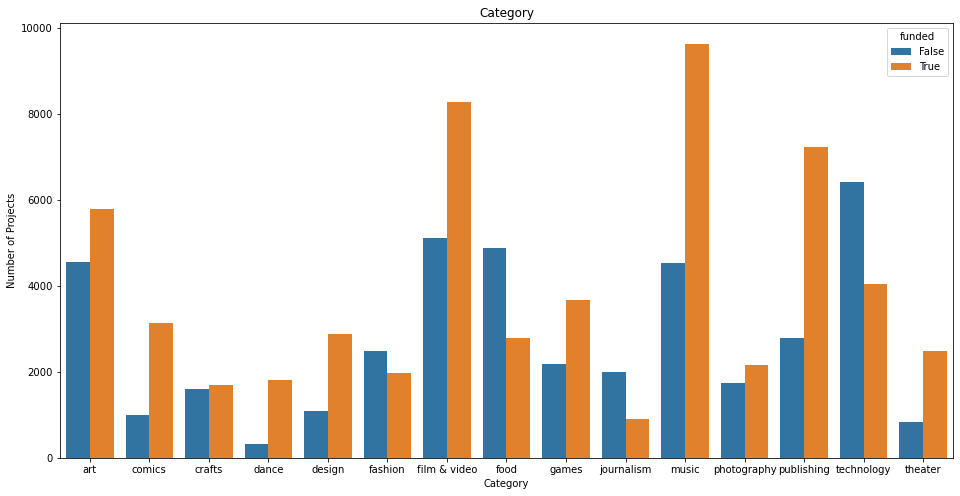

In [66]:
plot = sns.countplot(x=df.category, hue = df.funded)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')



In [ ]:
heatmaps
scatterplots for outliers
